# MOPITT Tutorial - Extracting the data and visualization
***

**Tutorial :** This tutorial provides a step to step guide to extract data from the Open Data Portal of the Canadian Space Agency. </br>
**Mission and Instrument :** MOPITT  
**Astronomical Target :** Measuring of carbon monoxide in the troposphere  
**System Requirements :** Python 3.8 or later  
**Tutorial Level :** Basic  

The purpose of this tutorial is to help demonstrate the process of accessing the MOPITT data, preparing it for use, and to show some basic data analysis and visualisation using the MOPITT data aboard Terra. This tutorial uses measurements of carbon monoxide in the troposphere as analysis data.



### Importing required libraries & Loading data

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
# Load data from the Open Data Portal
df = pd.DataFrame()
for day in range(1,4):
    try:
        df_tmp = pd.read_csv(f'https://data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MOPITT/2019/MOP02J-201901{str(day).zfill(2)}-L2V18.0.3.csv', engine='python')
    except Exception:
        continue
    df = pd.concat([df, df_tmp])

In [3]:
# Display the first rows to make sure everything is good
df.head()

,# Latitude,Longitude,COTotalColumn,COMixingRatio surface,COMixingRatio 900hPa,COMixingRatio 800hPa,COMixingRatio 700hPa,COMixingRatio 600hPa,COMixingRatio 500hPa,COMixingRatio 400hPa,COMixingRatio 300hPa,COMixingRatio 200hPa,COMixingRatio 100hPa,RetrievedSurfaceTemperature
0,-70.3974,123.458,4.664340e+17,42.5651,NaN,NaN,42.382,37.4212,33.2192,31.7189,32.0422,21.4270,14.8771,241.804
1,-71.2577,123.461,4.292510e+17,32.4784,NaN,NaN,NaN,30.1969,32.2419,35.2442,35.4249,21.4356,14.4509,232.572
2,-70.8910,124.231,3.849500e+17,30.8472,NaN,NaN,NaN,27.3463,27.2448,28.4969,30.0288,20.4061,14.5132,233.564
3,-71.5359,124.620,4.707770e+17,53.9822,NaN,NaN,NaN,45.2232,31.0651,27.2863,31.2066,25.4214,16.9910,236.716
4,-71.3551,124.994,3.545500e+17,37.4285,NaN,NaN,NaN,30.7856,24.6331,21.9155,22.6195,17.8905,14.3262,236.495


In [4]:
# Get the geo data
geometry = [Point(xy) for xy in zip(df[' Longitude'], df['# Latitude'])]
gdf = GeoDataFrame(df[' COTotalColumn'], geometry=geometry)
gdf.head()

,COTotalColumn,geometry
0,4.664340e+17,POINT (123.45800 -70.39740)
1,4.292510e+17,POINT (123.46100 -71.25770)
2,3.849500e+17,POINT (124.23100 -70.89100)
3,4.707770e+17,POINT (124.62000 -71.53590)
4,3.545500e+17,POINT (124.99400 -71.35510)


In [5]:
# Filter the concentration of carbon monoxide
d = gdf[' COTotalColumn'].values
t = d.mean() + (5 * d.std())
gdf_2 = gdf[gdf[' COTotalColumn'] < t]

### Showing the concentration of carbon monoxide

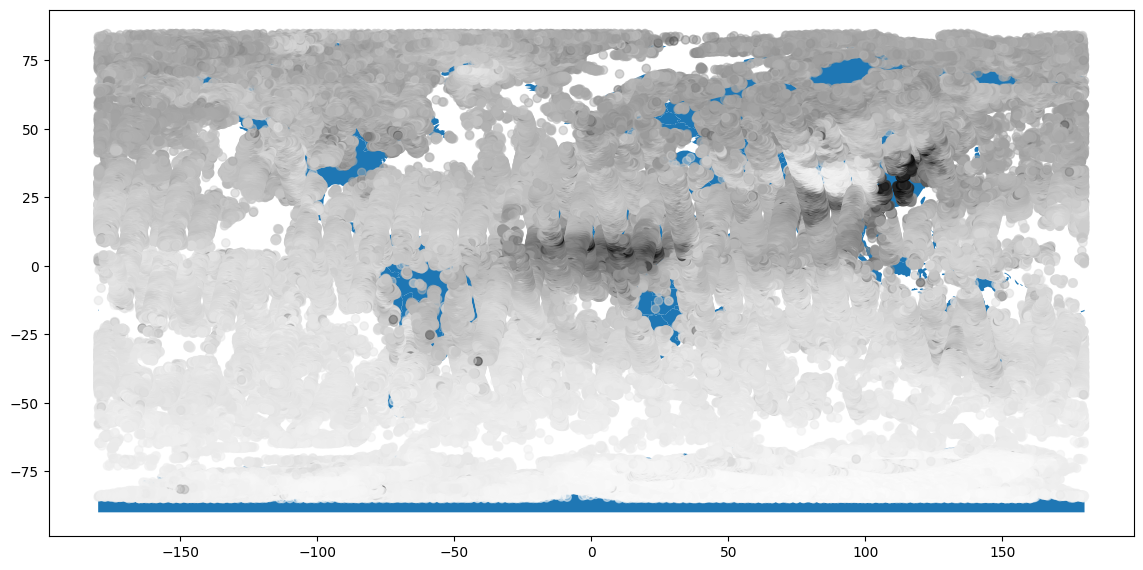

In [7]:
# Display the concentration of carbon monoxide
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_2.plot(ax=world.plot(figsize=(14, 9)), column=' COTotalColumn', cmap='Greys', alpha=0.5);

### Second scenario - Loading data

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#lecture des données / Read data
data = np.loadtxt('https://data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MOPITT/2018/MOP02J-20181206-L2V18.0.3.csv', delimiter=',', skiprows=0).T 

lat,long = data[0:2]    #Latitude + Longitude
COTotalColumn = data[2] #CO total
COMR_Surface = data[3]  #CO Mixing Ratio Surface
COMR_Profile = data[4:-1]   #CO Mixing Ratio profile (900hPa-100hPa)
RetrievedSurfaceTemperature = data[-1]  #Retrieved Surface Temperature

### Showing the concentration of carbon monoxide

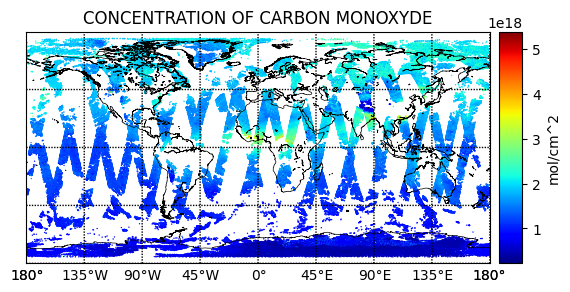

In [18]:
# VISUALISATION GRAPHIQUE DE LA COLONNE TOTALE DU CO SUR CARTE DU MONDE AVEC BASEMAP
# DATA VISUALIZATION OF CO TOTAL COLUMN ON WORLD MAP USING BASEMAP
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
sc = m.scatter(long, lat, c=COTotalColumn, s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label('mol/cm^2')
                        
plt.title('CONCENTRATION OF CARBON MONOXIDE')
fig = plt.gcf()
plt.show()